https://rachmadhana-ftds-12-p0m1.herokuapp.com/ deployed to Heroku

# Milestone 1

`Rachmadhana Mizwarudin Fahmi Batch 12`

## Identifikasi Masalah

### Objective
Departemen Pengawasan Lalu Lintas Kementerian Perhubungan Amerika Serikat ingin mengetahui kondisi kasus kecelakaan yang terjadi di jalan selama tahun 2016 yang berguna untuk diterapkan kebijakan baru supaya dapat mengurangi angka kecelakaan di kemudian hari. 

### Problem Statement
1. Negara bagian mana dengan jumlah angka kecelakaan paling tinggi?
2. Kecelakan lebih banyak terjadi di wilayah kota atau pedasaan?
3. Pada jam berapa kecelakaan sering terjadi?
4. Kecelakaan paling sering dialami oleh tipe kendaraan apa?
5. Pada wilayah urban berapa rata-rata angka fatalitynya?
6. Apakah ada perbedaan signifikan rata-rata angka fatality pada wilayah urban dengan wilayah Rural?

## Import Pustaka

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Queries

Cell dibawah merupakan salinan query yang telah dibuat di Google Cloud Platform

In [206]:
# select accident.state_name, accident.land_use_name, accident.hour_of_crash, accident.atmospheric_conditions_name, vehicle.body_type_name, accident.number_of_fatalities
# from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` AS accident
# INNER JOIN `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016` AS vehicle
# ON accident.consecutive_number = vehicle.consecutive_number
# WHERE accident.land_use_name in ('Rural', 'Urban')
# AND accident.state_name IS NOT NULL 
# AND accident.land_use_name IS NOT NULL
# AND accident.hour_of_crash IS NOT NULL
# AND accident.atmospheric_conditions_name IS NOT NULL
# AND vehicle.body_type_name IS NOT NULL
# AND accident.number_of_fatalities IS NOT NULL;

Data loading yang didapatkan dari google cloud platform

In [207]:
df = pd.read_csv('h8dsft_P0ML1_Rachmadhana.csv')
df

,consecutive_number,state_name,land_use_name,hour_of_crash,atmospheric_conditions_name,body_type_name,number_of_fatalities
0,560099,Wyoming,Rural,3,Snow,Standard Pickup,1
1,160226,Idaho,Rural,16,Blowing Snow,Utility Station Wagon,2
2,50006,Arkansas,Urban,3,Clear,Standard Pickup,1
3,482027,Texas,Urban,15,Clear,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
4,121570,Florida,Urban,19,Clear,Compact Utility (ANSI D-16 Utility Vehicle Cat...,1
...,...,...,...,...,...,...,...
52580,510436,Virginia,Urban,15,Not Reported,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
52581,350309,New Mexico,Urban,14,Clear,Motorcycle,1
52582,40777,Arizona,Rural,14,Not Reported,ATV (All-Terrain Vehicle; Includes 3 or 4 Wheels),1
52583,530422,Washington,Urban,3,Not Reported,Unknown Body Type,1


## Data Cleaning

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   consecutive_number           52585 non-null  int64 
 1   state_name                   52585 non-null  object
 2   land_use_name                52585 non-null  object
 3   hour_of_crash                52585 non-null  int64 
 4   atmospheric_conditions_name  52585 non-null  object
 5   body_type_name               52585 non-null  object
 6   number_of_fatalities         52585 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [209]:
for col in df:
  total_missing = df[col].isnull().sum()
  print(col, ' : ', total_missing)

consecutive_number  :  0
state_name  :  0
land_use_name  :  0
hour_of_crash  :  0
atmospheric_conditions_name  :  0
body_type_name  :  0
number_of_fatalities  :  0


In [210]:
df.rename(columns={'atmospheric_conditions_name':'cuaca',
                    'state_name' : 'negara_bagian',
                    'land_use_name':'wilayah',
                    'hour_of_crash':'jam_kecelakaan',
                    'body_type_name':'jenis_kendaraan',
                    'number_of_fatalities':'angka_kematian'
}, inplace=True)
df

,consecutive_number,negara_bagian,wilayah,jam_kecelakaan,cuaca,jenis_kendaraan,angka_kematian
0,560099,Wyoming,Rural,3,Snow,Standard Pickup,1
1,160226,Idaho,Rural,16,Blowing Snow,Utility Station Wagon,2
2,50006,Arkansas,Urban,3,Clear,Standard Pickup,1
3,482027,Texas,Urban,15,Clear,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
4,121570,Florida,Urban,19,Clear,Compact Utility (ANSI D-16 Utility Vehicle Cat...,1
...,...,...,...,...,...,...,...
52580,510436,Virginia,Urban,15,Not Reported,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
52581,350309,New Mexico,Urban,14,Clear,Motorcycle,1
52582,40777,Arizona,Rural,14,Not Reported,ATV (All-Terrain Vehicle; Includes 3 or 4 Wheels),1
52583,530422,Washington,Urban,3,Not Reported,Unknown Body Type,1


## Analisis dan perhitungan

<AxesSubplot:xlabel='negara_bagian'>

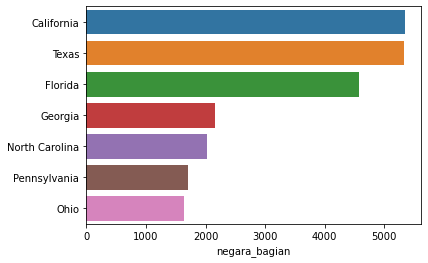

In [211]:
# Negara bagian mana dengan jumlah angka kecelakaan paling tinggi?
crash_freq = df['negara_bagian'].value_counts().head(7)
sns.barplot(x=crash_freq, y=crash_freq.index, orient='h')

`Berdasarkan diagram batang diatas dapat disimpulkan bahwa negara bagian california merupakan negara bagian dengan tingkat kecelakaan paling tinggi, posisi kedua ditempati texas dengan hasil yang sangat mendekati california, urutan ketiga hingga ketujuh berturut-turut ditempati oleh florida, georgia, north carolina, pennsylvania, ohio`

<AxesSubplot:ylabel='wilayah'>

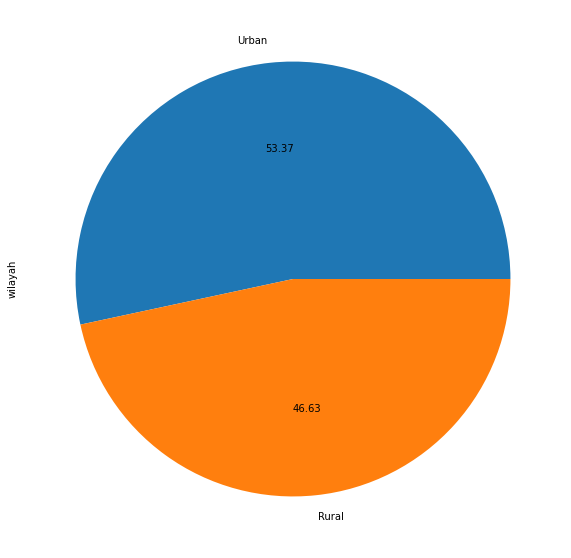

In [212]:
# Kecelakan lebih banyak terjadi di wilayah kota atau pedasaan?
df['wilayah'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

`berdasarkan pie chart 53.37% kecelakaan terjadi di daerah urban (perkotaan) dan sisanya terjadi di rural (pedesaan)`

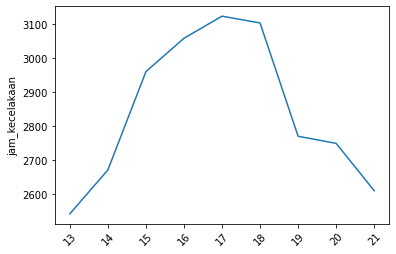

In [213]:
# Pada jam berapa kecelakaan sering terjadi?
jam_kecelakaan = df['jam_kecelakaan'].value_counts().head(9)
sns.lineplot(x=jam_kecelakaan.index ,y=jam_kecelakaan)
plt.xticks(rotation=45)
plt.show()

`Diagram garis menunjukan tingkat kecelakaan meningkat dimulai dari pukul 14.00 hingga puncaknya terjadi pada pukul 17.00 kemudian terus mengalami penurunan`

<AxesSubplot:>

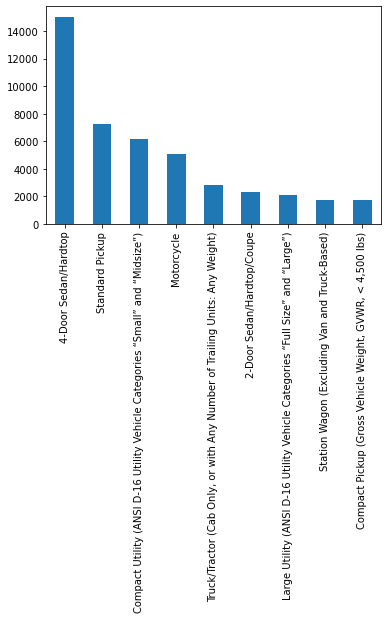

In [214]:
# Kecelakaan paling sering dialami oleh tipe kendaraan apa?
df['jenis_kendaraan'].value_counts().head(9).plot(kind='bar')

`Berdasarkan diagram dapat diambil kesimpulan bahwa kendaraan 4-Door Sedan/Hardtop merupakan jenis kendaraan yang paling sering mengalami kecelakaan, kemudian posisi ke dua ditempati Standard Pickup, posisi ke tiga Compact Utility (ANSI D-16 Utility Vehicle Categories “Small” and “Midsize”) dan posisi ke empat Motorcycle`

In [215]:
# Pada wilayah urban berapa rata-rata angka fatalitynya?
df_copy = df.drop(['consecutive_number','negara_bagian','jam_kecelakaan','jenis_kendaraan'], axis=1)
df_copy

,wilayah,cuaca,angka_kematian
0,Rural,Snow,1
1,Rural,Blowing Snow,2
2,Urban,Clear,1
3,Urban,Clear,1
4,Urban,Clear,1
...,...,...,...
52580,Urban,Not Reported,1
52581,Urban,Clear,1
52582,Rural,Not Reported,1
52583,Urban,Not Reported,1


In [216]:
urban = df_copy[df_copy['wilayah'] == 'Urban'].groupby('cuaca').sum() # groupby cuaca hanya sebagai dummy agar mendapatkan nilai angka kematian
urban

,angka_kematian
cuaca,
"Blowing Sand, Soil, Dirt",4
Clear,22500
Cloudy,4361
"Fog, Smog, Smoke",161
Freezing Rain or Drizzle,12
Not Reported,1156
Other,52
Rain,1790
Severe Crosswinds,17


In [217]:
print('Average angka_kematian: {}'.format(np.round(urban.angka_kematian.mean())))
print('Median angka_kematian: {}'.format(np.round(urban.angka_kematian.median())))
print('Modus angka_kematian: {}'.format(np.round(urban.angka_kematian.mode())))

Average angka_kematian: 2530.0
Median angka_kematian: 114.0
Modus angka_kematian: 0         4
1        12
2        17
3        34
4        52
5        67
6       161
7       208
8      1156
9      1790
10     4361
11    22500
Name: angka_kematian, dtype: int64


`Berdasarkan hasil perhitungan rata-rata angka kematian diwilayah urban pada tahun 2016 sebesar 2530`

Apakah ada perbedaan rata-rata angka fatality pada cuaca yang berbeda?

H0: μ_Urban == μ_Rural

H1: μ_Urban != μ_Rural

In [219]:
# uji two sample independent
Rural = df_copy[df_copy['wilayah'] == 'Rural'].groupby('cuaca').sum() # groupby cuaca hanya sebagai dummy agar mendapatkan nilai angka kematian
urban = df_copy[df_copy['wilayah'] == 'Urban'].groupby('cuaca').sum() # groupby cuaca hanya sebagai dummy agar mendapatkan nilai angka kematian

t_stat, p_val = stats.ttest_ind(urban,Rural)
print('P-value:',p_val) 

P-value: [0.87695144]


`Hasil perhitungan menunjukan tidak ada perbedaan rata-rata fatality antara wilayah urban dengan wilayah rural`

## Pengambilan Kesimpulan

Kendaraan meruapakan sebuah alat yang memudahkan manusia untuk berpindah dari satu tempat ke tempat lainnya dan menghemat banyak waktu. Namun pada implementasinya penggunaan kendaraan juga memiliki resiko terhadap kita sebagai pengendara, yaitu kecelakaan.

Dari keseluruhan negara bagian Amerika serikat, California menduduki posisi pertama dengan tingkat kecelakaan tertinggi dengan lebih dari 5000 kasus yang terjadi, posisi kedua ditempati texas dengan hasil yang sangat mendekati california, urutan ketiga hingga ketujuh berturut-turut ditempati oleh florida, georgia, north carolina, pennsylvania, ohio.

Dari wilayah bagian ini kami melakukan penelitian dan mendapatkan hasil bahwa kecelakaan yang terjadi lebih banyak di wilayah urban (perkotaan) dibanding dengan wilayah rural (pedesaan) dengan persentase sebesar 53.37%. Dimana angka tertinggi kecelakaan terjadi pada pukul 17.00, waktu tersebut merupakan puncak mobilitas orang setelah bekerja. Kecelakaan yang terjadi di dominasi  oleh kendaraan 4-Door Sedan/Hardtop dengan lebih dari 14000 kejadian, posisi ke dua ditempati Standard Pickup, posisi ke tiga Compact Utility (ANSI D-16 Utility Vehicle Categories “Small” and “Midsize”) dan posisi ke empat Motorcycle.

Berdasarkan hasil perhitungan menunjukan bahwa tidak terdapat perbedaan rata-rata kecelakaan diwilayah urban maupun rural yang signifikan, hal tersebut dapat menjadi pertimbangan pemerintah untuk memberlakukan kebijakan pembatasan kecepatan kendaraan di jam sibuk dan juga memberikan rambu peringatan agar masyarakat lebih berhati-hati dimana kebijakan tersebut bersekala nasional.